In [1]:
#from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests

import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp

from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.cluster import AgglomerativeClustering, DBSCAN

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

plt.rcParams["figure.figsize"] = (5,5)

from pandas_datareader import wb

import seaborn as sns

from sklearn import preprocessing
import Rung as rung

import reverse_geocoder as rg
from datetime import datetime

plt.rcParams["figure.figsize"] = (20,10)
from scipy import signal

Could not import rpy package
Could not import r-package RCIT


In [2]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
class_dic = load_obj("class_dic")

In [3]:
def data_finder(country_code, file_name = '../../../nc/precip.mon.total.v2018.nc', temporal_limits= {"time_min":datetime(1891, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0) } ):
    
    d = Data(file_name,'precip',temporal_limits,missing_value=-9.96921e+36)

    result = d.get_data()
    lon_list = d.get_lon_list()
    lat_list = d.get_lat_list()
    
    coordinates = list(zip(lat_list,lon_list))
    dic = rg.search(coordinates)
    country = []
    for i in range(len(dic)):
        country.append(dic[i].get('cc'))

    ET_index = np.where(np.array(country)== country_code)[0]
    ET_data = result[:,ET_index]
    return(ET_data)

In [9]:
d = data_finder("IR")

Loading formatted geocoded file...


In [ ]:
file_name = '../../../nc/precip.mon.total.v2018.nc'
temporal_limits= {"time_min":datetime(1970, 1, 1, 0, 0),"time_max":datetime(2010, 12, 1, 0, 0) }
train = data_finder("IR", file_name, temporal_limits)



temporal_limits= {"time_min":datetime(2011, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0) }
test = data_finder("IR", file_name, temporal_limits)


In [22]:
file_name = '../../../nc/precip.mon.total.2.5x2.5.v2018.nc'
temporal_limits= {"time_min":datetime(1970, 1, 1, 0, 0),"time_max":datetime(2010, 12, 1, 0, 0) }
d = Data(file_name,'precip',temporal_limits,missing_value=-9.96921e+36)

train = d.get_data()

temporal_limits= {"time_min":datetime(2011, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0) }
d = Data(file_name,'precip',temporal_limits,missing_value=-9.96921e+36)

test = d.get_data()


In [24]:
test.shape

(60, 671)

In [27]:
train, avgs, stds = pf.deseasonalize_avg_std(np.array(train))
V, U, S, ts, eig, explained, max_comps = rung.pca_svd(pd.DataFrame(train) ,truncate_by='max_comps', max_comps=30)

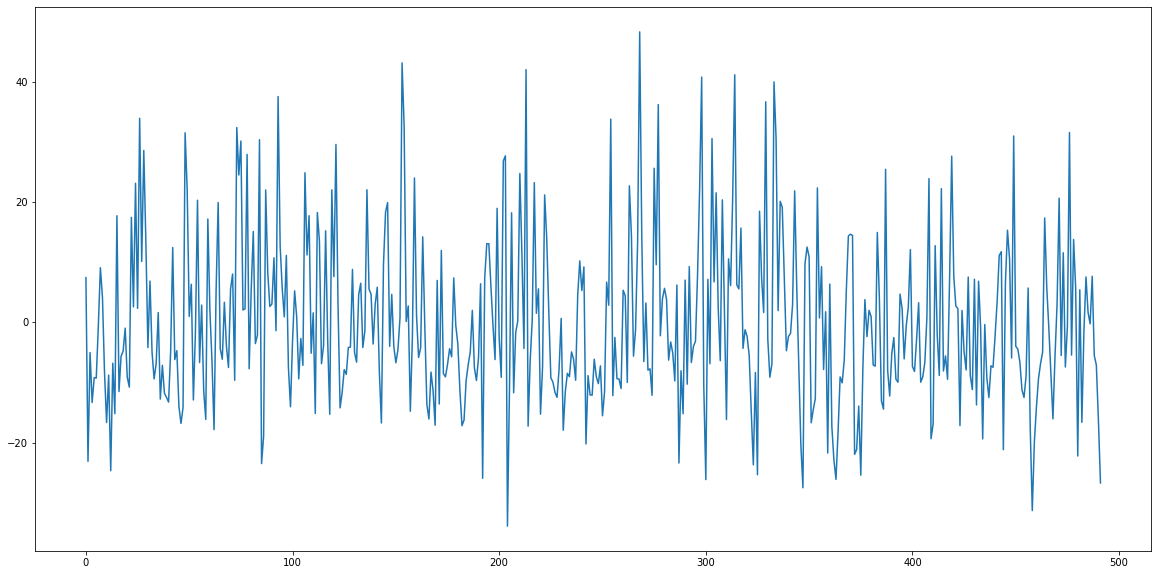

In [41]:
plt.plot(ts[:,0])

In [42]:
n_steps = 20

In [ ]:
for i in range(len(ts)):
    

In [44]:
ts.shape

(492, 30)

In [39]:
np.dot(ts,V.T).shape

(492, 671)

In [33]:
train.shape

(492, 671)

In [36]:
V.shape

(671, 30)

In [34]:
U.shape

(492, 30)

In [19]:
train.shape

(492, 3638)

In [20]:
test.shape

(60, 3638)

In [8]:
def neighbour_vote_class(dic,lat,lon):
    shift = [[-0.25,0.25],[-0.25,0.25]]
    shift_list = []
    for element in itertools.product(*shift):
        shift_list.append(element)
    #shift_list.remove((0,0))
    result = []
    for x,y in shift_list:
        if lon > 180: lon -= 360
        if (lat + y, lon + x) in class_dic.keys():
            result.append(class_dic[(lat + y, lon + x)])   
    return(np.array(result))

In [4]:
sst = Data('../../../nc/Cal_18912015.nc','precip', missing_value= -9.96921e+36)

result = sst.get_data()
lon_list = sst.get_lon_list()
lat_list = sst.get_lat_list()

In [5]:
index = np.load("Cal_index.npy")

In [6]:
index.shape

(351,)

In [7]:
class_list = []
for i in range(len(lon_list)):
    lon, lat = lon_list[i], lat_list[i]
    if lon > 180: lon -= 360
    if (lat, lon) in class_dic.keys(): 
        class_list.append(class_dic[(lat, lon)])
    else:
        class_list.append(np.nan)

In [11]:
class_list=np.array(class_list)

In [13]:
class_list = class_list[index]

In [11]:
df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list, "class": class_list})

In [100]:
index = (np.array(class_list) == "Csb")

In [98]:
result.shape

(1500, 351)

In [77]:
result[:,index].shape

(1500, 105)

In [17]:
np.save("Cal_class_list.npy",class_list)

In [59]:
set(class_list)

{'BSh', 'BSk', 'BWh', 'BWk', 'Csa', 'Csb', 'Dfb', 'Dsb', 'Dsc', nan}

In [14]:
c = Counter(class_list)

In [15]:
n_most_common = 3
most_common = c.most_common()[:n_most_common]

In [16]:
most_common

[('Csb', 88), ('Csa', 28), ('BWh', 22)]

In [124]:
most_common[0][0]

'Csb'

In [121]:
for j in range(n_most_common):
    class_name = most_common[j][0]
    index = (np.array(class_list) == class_name)

In [123]:
index

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
c = result([1,2,3,4,3,3,2,4,5,6,1,2,3,4,5,1,2,3,4,6,5])
c.most_common()
[(3, 5), (2, 4), (4, 4), (1, 3), (5, 3), (6, 2)]
>>> value, count = c.most_common()[0]

In [38]:
    lon, lat = lon_list[8], lat_list[8]
    if lon > 180: lon -= 360

In [88]:
ET_gamma = np.load('../../../nc/Cal_gamma_18912015.npy')

In [104]:
index.shape

(351,)

In [107]:
ET_gamma[:,index]

array([[ 0.12677103, -0.03044447, -0.51265922, ...,  1.78486187,
         1.71794777,  1.97556266],
       [-0.45520462, -0.63225089, -1.24563575, ...,  1.99020202,
         1.70545534,  2.01669268],
       [-0.44519712, -0.41238675, -0.98416987, ...,  2.65116967,
         2.21623548,  2.45616124],
       ...,
       [ 0.10214338, -0.18474552, -0.52022061, ..., -0.21262866,
         0.06809114,  0.1621509 ],
       [-0.13706792, -0.44070439, -0.86743253, ..., -0.18036858,
         0.12276202,  0.21990666],
       [-0.13265519, -0.43828937, -0.84512609, ..., -0.2408276 ,
         0.13205866,  0.21710786]])

In [96]:
ET_gamma.shape

(1128, 351)

In [42]:
class_list

[nan,
 nan,
 nan,
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 nan,
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 nan,
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csa',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csa',
 'Csa',
 'Csa',
 'Csa',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 nan,
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csa',
 'Csa',
 'Csa',
 'Csa',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 nan,
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csa',
 'Csa',
 'Csa',
 'Csa',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csa',
 'Csa',
 'Csa',
 'BSk',
 'BSk',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 nan,
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csa',
 'Csa',
 'BSk',
 'BSk',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Dsb',
 'Csb',
 'Csb',
 'Csa',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csb',
 'Csa',
 'BSk',
 'BSk',


In [10]:
result.shape

(1500, 351)

In [17]:
neighbour_vote_class(class_dic,lat_list[250], lon_list[250])

array([], dtype=float64)

In [22]:
lon, lat = lon_list[250], lat_list[250]

In [23]:
lon

243.25

In [24]:
lat

32.75

In [19]:
    shift = [[-0.25,0.25],[-0.25,0.25]]
    shift_list = []
    for element in itertools.product(*shift):
        shift_list.append(element)
    #shift_list.remove((0,0))
    result = []

In [21]:
shift_list

[(-0.25, -0.25), (-0.25, 0.25), (0.25, -0.25), (0.25, 0.25)]

In [26]:
lon -= 360

In [35]:
class_dic[(lat,lon)]

KeyError: (42.25, -124.75)

In [39]:
        shift = [[-0.25,0.25],[-0.25,0.25]]
        shift_list = []
        for element in itertools.product(*shift):
            shift_list.append(element)
        result = []
        for x,y in shift_list:
            if (lat + y, lon + x) in class_dic.keys():
                result.append(class_dic[(lat + y, lon + x)]) 

In [40]:
result

[]

# Eithopia

In [4]:
level = 12
temporal_limits = {"time_min":datetime(1891, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0) } 
spatial_limits = {"lon_min":-40,"lon_max":60,"lat_min":-40,"lat_max":40}

In [5]:
d = Data('../../../nc/precip.mon.total.v2018.nc','precip',temporal_limits,missing_value=-9.969209968386869e+36)

result = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

In [6]:
coordinates = list(zip(lat_list,lon_list))

dic = rg.search(coordinates)

Loading formatted geocoded file...


In [7]:
country = []
for i in range(len(dic)):
    country.append(dic[i].get('cc'))

In [8]:
ET_index = np.where(np.array(country)== "ZW")[0]

In [9]:
result = result[:,ET_index]

In [10]:
lon_list = np.array(lon_list)[ET_index]
lat_list = np.array(lat_list)[ET_index]

In [11]:
class_list = []
for i in range(len(lon_list)):
    lon, lat = lon_list[i], lat_list[i]
    if lon > 180: lon -= 360
    if (lat, lon) in class_dic.keys(): 
        class_list.append(class_dic[(lat, lon)])
    else:
        class_list.append(np.nan)

In [2]:
class_list = np.load("../npy_files/ET_class_list.npy")
#class_name = "BSh"
#index = (np.array(class_list) == class_name)


In [12]:
df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list, "class": class_list})

In [3]:
c = Counter(class_list)

n_most_common = 10
most_common = c.most_common()[:n_most_common]

In [4]:
#ZW
most_common

[('Aw', 117),
 ('BSh', 81),
 ('Cwb', 63),
 ('Cfb', 31),
 ('Cwa', 4),
 ('As', 4),
 ('Am', 1),
 ('BSk', 1),
 ('BWh', 1)]

In [25]:
#ZA

most_common

[('BSk', 105),
 ('BSh', 84),
 ('BWk', 59),
 ('BWh', 57),
 ('Cwb', 53),
 ('Cfb', 48),
 ('Cfa', 31),
 ('Cwa', 17),
 ('Csb', 11),
 (nan, 4)]

In [17]:
most_common

[('BSk', 105),
 ('BSh', 84),
 ('BWk', 59),
 ('BWh', 57),
 ('Cwb', 53),
 ('Cfb', 48),
 ('Cfa', 31),
 ('Cwa', 17),
 ('Csb', 11),
 (nan, 4)]

In [21]:
len(class_list)

475

In [18]:
np.save("./ZW_class_list.npy",class_list)

In [85]:
index = np.array(class_list) == 'Cwb'

In [43]:
def drought_timeseries_class(file_name, index, start_year = 1922, end_year=2015, extremes_treshold = -1, base_year = 1922):
    start_index = (start_year - base_year) * 12
    end_index = start_index + (end_year - (start_year - 1))*12
    ET_gamma = np.load(file_name)
    ET_gamma = ET_gamma[:,index]
    N = ET_gamma.shape[0]
    count = []
    for i in range(N):
        count.append(np.count_nonzero(ET_gamma[i,:] <= extremes_treshold))
    count_detrend = signal.detrend(count[start_index:end_index])
    return(count[start_index:end_index], count_detrend)


In [88]:
def drought_timeseries(file_name, start_year = 1922, end_year=2015, extremes_treshold = -1, base_year = 1922):
    start_index = (start_year - base_year) * 12
    end_index = start_index + (end_year - (start_year - 1))*12
    ET_gamma = np.load(file_name)
    N = ET_gamma.shape[0]
    count = []
    for i in range(N):
        count.append(np.count_nonzero(ET_gamma[i,:] <= extremes_treshold))
    count_detrend = signal.detrend(count[start_index:end_index])
    return(count[start_index:end_index], count_detrend)

In [99]:
x = np.arange('1976-01', '2010-01', dtype='datetime64[M]')

In [86]:
original_cwb, count = drought_timeseries_class("../npy_files/ET_gamma_18912015.npy",index,1977,2010)

In [90]:
original, count = drought_timeseries("../npy_files/ET_gamma_18912015.npy",1977,2010)

In [78]:
original = np.array(original)/31

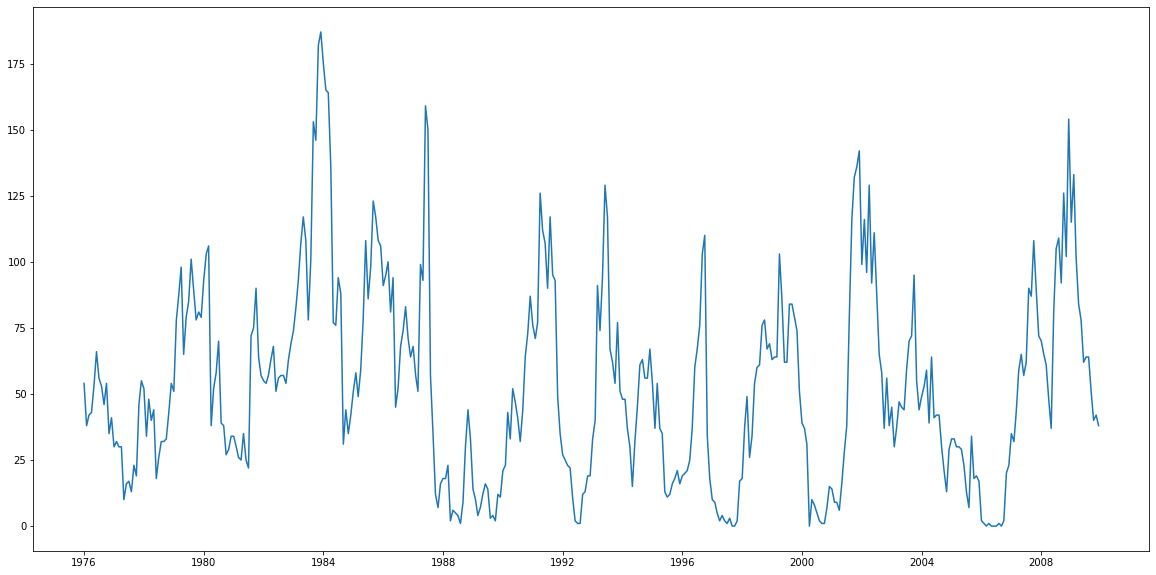

In [100]:
plt.plot(x,original)

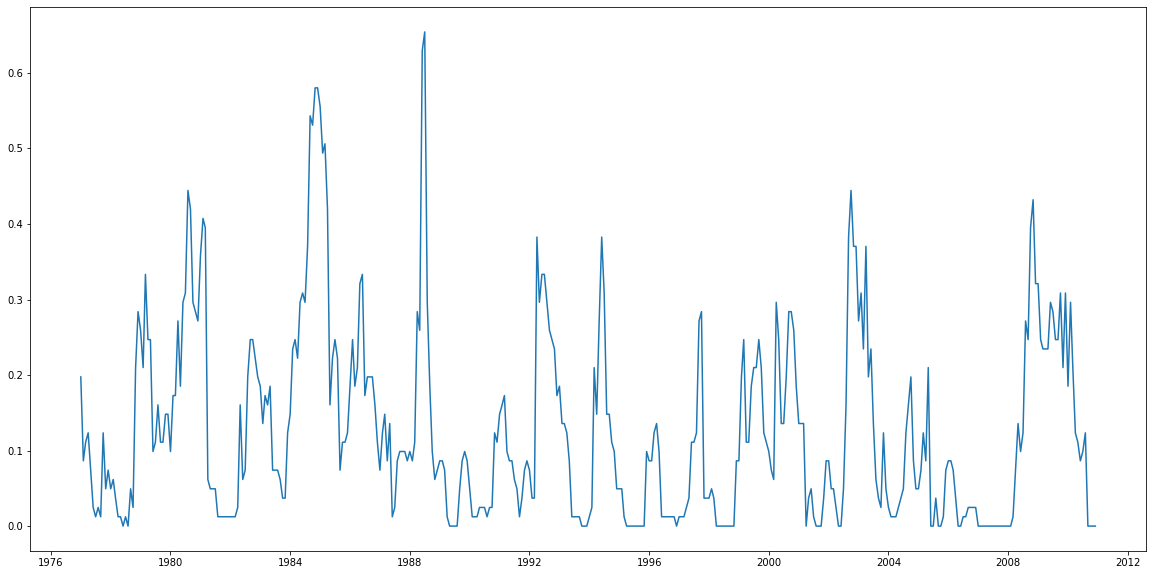

In [69]:
plt.plot(x,original)

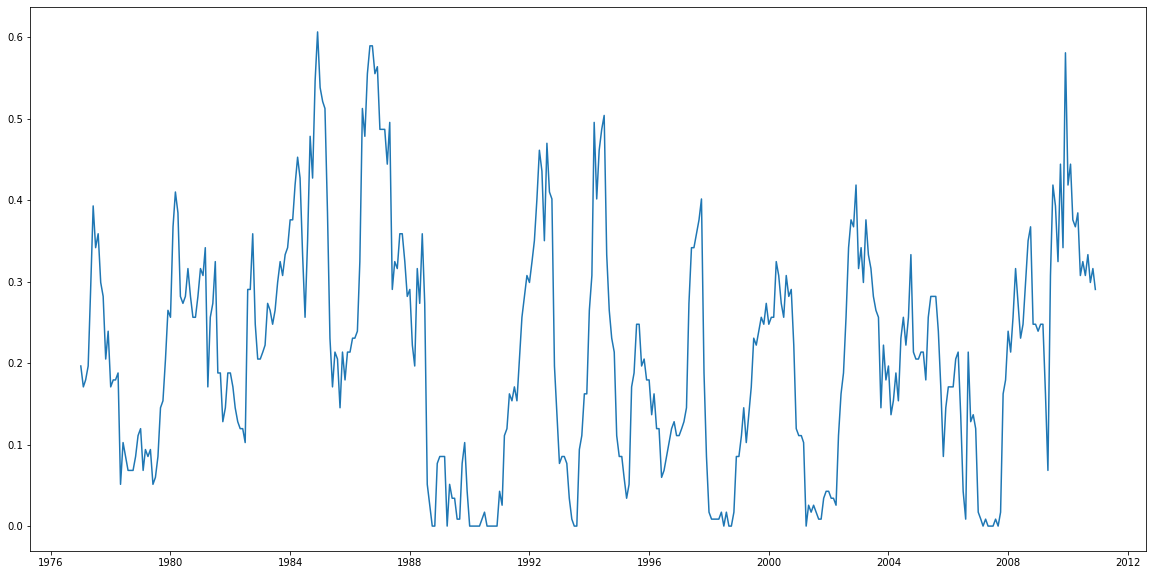

In [74]:
plt.plot(x,original)

In [91]:
df = pd.DataFrame({"original":original, "original_aw":original_aw, "original_bsh":original_bsh, "original_cfb":original_cfb, "original_cwb":original_cwb})

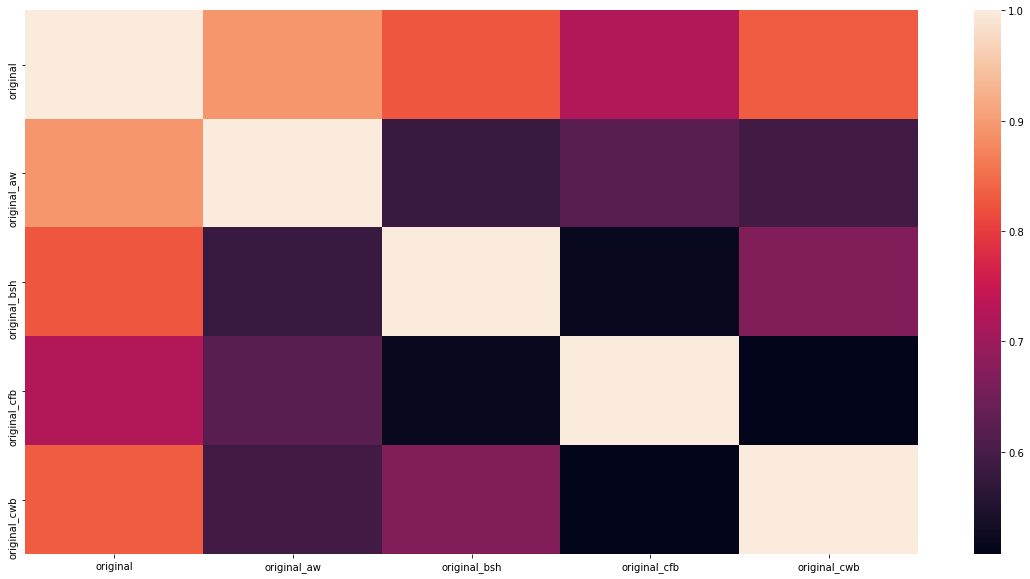

In [92]:
sns.heatmap(df.corr())

In [93]:
df.corr()

,original,original_aw,original_bsh,original_cfb,original_cwb
original,1.000000,0.893298,0.826573,0.723518,0.831943
original_aw,0.893298,1.000000,0.581247,0.619990,0.593048
original_bsh,0.826573,0.581247,1.000000,0.518824,0.668358
original_cfb,0.723518,0.619990,0.518824,1.000000,0.507346
original_cwb,0.831943,0.593048,0.668358,0.507346,1.000000


In [98]:
np.save("ET_class_list.npy",np.array(class_list))